# Wine Quality

I work with the Wine Quality data set. The regression task is to estimate the quality of a wine given its attributes.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('data/winequality-white.csv', sep=';')

## Exploratory Data Analysis

In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


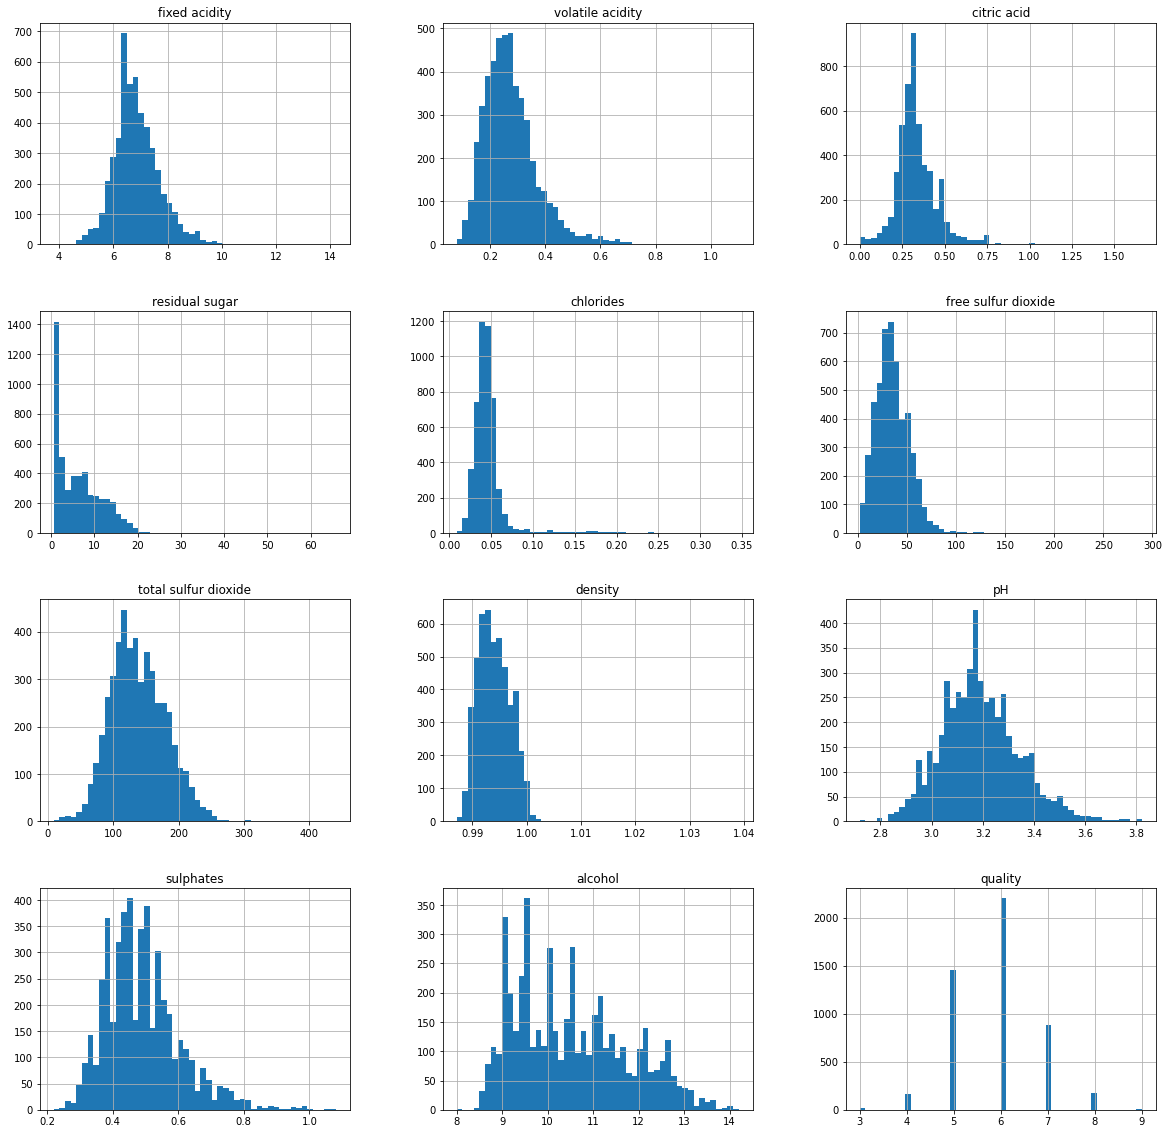

In [4]:
data.hist(bins=50, figsize=(20, 20))
plt.show()

In [29]:
corr_matrix = data.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

## Data Preparation

In [5]:
# Create train/test sets and X/y pairs
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
X_train = train.drop('quality', axis=1)
y_train = train['quality'].copy()
X_test = test.drop('quality', axis=1)
y_test = test['quality'].copy()

In [6]:
# Scale features
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
X_train_prep = stdscaler.fit_transform(X_train)
X_test_prep = stdscaler.transform(X_test)

## Basic ML Models

In [6]:
# Start with base-level prediction
from sklearn.metrics import mean_squared_error

predictions = [y_train.mean()] * len(y_train)
base_mse = mean_squared_error(predictions, y_train)
base_mse = np.sqrt(base_mse)
base_mse

0.8867994142404612

In [9]:
# Simple linear regression model
from sklearn.linear_model import LinearRegression

# Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train_prep, y_train)
# Measure training loss
predictions = lin_reg.predict(X_train_prep)
lin_mse = mean_squared_error(predictions, y_train)
lin_mse = np.sqrt(lin_mse)
lin_mse

0.7502172818316427

In [10]:
# Measure k-fold cross-validation loss
from sklearn.model_selection import cross_val_score

# cross_val_score expects utility function, not loss function
lin_scores = cross_val_score(lin_reg, X_train_prep, y_train, 
                         scoring="neg_mean_squared_error", cv=10)
lin_scores = np.sqrt(-lin_scores)
lin_scores.mean(), lin_scores.std()

(0.7525277645111913, 0.04313342916930864)

In [11]:
# Decision tree model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prep, y_train)
# Measure training loss
predictions = tree_reg.predict(X_train_prep)
tree_mse = mean_squared_error(predictions, y_train)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

In [12]:
# Measure cross-validation loss
tree_scores = cross_val_score(tree_reg, X_train_prep, y_train, 
                         scoring="neg_mean_squared_error", cv=10)
tree_scores = np.sqrt(-tree_scores)
tree_scores.mean(), tree_scores.std()

(0.881229842595989, 0.03729342336290044)

In [7]:
# Random forest model
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_prep, y_train)
# Measure training loss
predictions = forest_reg.predict(X_train_prep)
forest_mse = mean_squared_error(predictions, y_train)
forest_mse = np.sqrt(forest_mse)
forest_mse

0.2306654709077995

In [14]:
# Measure cross-validation loss
forest_scores = cross_val_score(forest_reg, X_train_prep, y_train, 
                         scoring="neg_mean_squared_error", cv=10)
forest_scores = np.sqrt(-forest_scores)
forest_scores.mean(), forest_scores.std()

(0.6236919706699335, 0.035345768629928914)

In [33]:
# SVM model
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_prep, y_train)
# Training loss
predictions = svr.predict(X_train_prep)
svr_mse = mean_squared_error(predictions, y_train)
svr_mse = np.sqrt(svr_mse)
svr_mse

0.6277916391386317

In [46]:
# Cross-validation loss
svr_scores = cross_val_score(svr, X_train_prep, y_train,
                             scoring="neg_mean_squared_error", cv=10)
svr_scores = np.sqrt(-svr_scores)
svr_scores.mean(), svr_scores.std()

(0.693354085198933, 0.03555820940991809)

### Fine Tuning

In [58]:
# Grid search on random forest
from sklearn.model_selection import GridSearchCV

# Ran in various incarnations based on intermediate results
tree_grid = {'n_estimators': [300, 600, 900], 'max_depth': [20, 30, 45], 'max_features': [1, 3, 9]}
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, tree_grid, scoring="neg_mean_squared_error")
grid_search.fit(X_train_prep, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [30], 'max_features': [3],
                         'n_estimators': [600]},
             scoring='neg_mean_squared_error')

In [59]:
grid_search.best_params_

{'max_depth': 30, 'max_features': 3, 'n_estimators': 600}

In [60]:
# Training error
forest_reg = grid_search.best_estimator_
predictions = forest_reg.predict(X_train_prep)
forest_mse = mean_squared_error(predictions, y_train)
forest_mse = np.sqrt(forest_mse)
forest_mse

0.22417283897879908

In [61]:
# Cross-validation error
forest_cv = grid_search.cv_results_['mean_test_score'].max()
forest_cv = np.sqrt(-forest_cv)
forest_cv

0.6189297791841215

In [64]:
# Grid search on SVR
svr_grid = {'kernel': ['rbf'], 'C': [2.5, 5], 'epsilon': [0.25, 0.5]}
svr = SVR()
grid_search = GridSearchCV(svr, svr_grid, scoring="neg_mean_squared_error")
grid_search.fit(X_train_prep, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [2.5, 5], 'epsilon': [0.25, 0.5],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

In [65]:
grid_search.best_params_

{'C': 2.5, 'epsilon': 0.25, 'kernel': 'rbf'}

In [67]:
# Training error
svr = grid_search.best_estimator_
predictions = svr.predict(X_train_prep)
svr_mse = mean_squared_error(predictions, y_train)
svr_mse = np.sqrt(svr_mse)
svr_mse

0.5889396721481854

In [68]:
# Cross-validation error
svr_cv = grid_search.cv_results_['mean_test_score'].max()
svr_cv = np.sqrt(-svr_cv)
svr_cv

0.6867259020679415

In [47]:
# Save best models
import pickle

forest_tuple = (forest_reg, forest_cv)
pickle.dump(forest_tuple, open("models/forest_model.pkl", "wb"))

svr_tuple = (svr, svr_cv)
pickle.dump(svr_tuple, open("models/svr_model.pkl", "wb"))

### Final Model

In [69]:
# Test error
final_model = forest_reg
predictions = final_model.predict(X_test_prep)
mse = mean_squared_error(predictions, y_test)
mse = np.sqrt(mse)
mse

0.5763289975160201

## Neural Network Models

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
# Convert data to tensors and create validation set
X_train_v = torch.tensor(X_train_prep, dtype=torch.float32)
y_train_v = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
X_train_v, X_val_v, y_train_v, y_val_v = train_test_split(X_train_v, y_train_v, test_size=0.1)
X_test_v = torch.tensor(X_test_prep, dtype=torch.float32)
y_test_v = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

In [11]:
# Define shallow and deep NN modules
class NN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(11, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
    
    def forward(self, x):
        return self.network(x)
    
class NN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(11, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
    
    def forward(self, x):
        return self.network(x)

In [13]:
# Shallow model
model1 = NN1()
loss_fn = nn.MSELoss()
optim1 = optim.Adam(model1.parameters())

In [143]:
# Deeper model
model2 = NN2()
optim2 = optim.Adam(model2.parameters())

In [170]:
# Deeper model with L2 regularization
model3 = NN2()
optim3 = optim.Adam(model3.parameters(), weight_decay=0.001)

In [171]:
from torch.utils.tensorboard import SummaryWriter

# NOTE: Reset when testing new model
model, name, optimizer = model3, "model3", optim3
global_epoch = 0
min_loss = None

# Make summary writer
writer = SummaryWriter(f'runs/{name}')
writer.add_graph(model, X_train_v[0])
writer.add_embedding(X_train_v, metadata=y_train_v)

In [165]:
# Training loop
def train(X, y, model, loss_fn, optimizer, writer):
    size = len(X)
    avg_loss = 0.0
    for i, x in enumerate(X):
        # Make prediciton
        pred = model(x)
        loss = loss_fn(pred, y[i])
        avg_loss += loss.item()
        # Optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Print summary data
        if (i + 1) % 100 == 0:
            avg_loss /= 100
            print(f'training loss: {avg_loss}')
            writer.add_scalar('training loss', avg_loss, global_step = global_epoch * len(X) + i)
            writer.flush()
            avg_loss = 0.0

In [9]:
# Validation loop
def val(X, y, model, loss_fn, writer=None, name=None):
    model.eval()
    
    size = len(X)
    val_loss = 0.0
    # Compute loss on set
    with torch.no_grad():
        for i, x in enumerate(X):
            pred = model(x)
            val_loss += loss_fn(pred, y[i]).item()
    val_loss /= size
    
    # Print summary data
    if writer is not None:
        print(f'validation_loss: {val_loss}')
        writer.add_scalar('validation loss', val_loss, global_step = global_epoch)
        writer.flush()
    if name is not None and global_epoch % 50 == 0:
        torch.save(model, f'models/NN_{name}_{global_epoch}.pth')
    
    model.train()
    return val_loss

In [176]:
# Run for number of epochs
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n------------------------------")
    
    # Shuffle data
    perm = torch.randperm(len(X_train_v))
    X = X_train_v[perm]
    y = y_train_v[perm]
    
    # Train and compute validation loss
    train(X, y, model, loss_fn, optimizer, writer)
    loss = val(X_val_v, y_val_v, model, loss_fn, writer, name)
    
    global_epoch += 1
    print()
    
    # Update best model
    if min_loss is None or loss < min_loss:
        min_loss = loss
        print("New best model.")
        torch.save(model, f'models/NN_{name}.pth')
        
print("Done!")
writer.close()

Epoch 1
------------------------------
training loss: 0.401981549912216
training loss: 0.32889697881437313
training loss: 0.3208599850651808
training loss: 0.3637877637564088
training loss: 0.3571837540949946
training loss: 0.24785457792711896
training loss: 0.4212871479272144
training loss: 0.34654833721830075
training loss: 0.27949733243880476
training loss: 0.31750818889413496
training loss: 0.31562711870836213
training loss: 0.31697031567498923
training loss: 0.2847757696831832
training loss: 0.4286951813774795
training loss: 0.4309986798901809
training loss: 0.4809764934548389
training loss: 0.4574608810513769
training loss: 0.3260750366869456
training loss: 0.3237614437741149
training loss: 0.40020354684616904
training loss: 0.28100975819172164
training loss: 0.36216145271388994
training loss: 0.28682082724513747
training loss: 0.3544771045750167
training loss: 0.32439260840372297
training loss: 0.4504751240497717
training loss: 0.44982359486408313
training loss: 0.43547036436881

training loss: 0.2877949400199577
training loss: 0.44109853686386485
training loss: 0.29689625465192876
training loss: 0.2501363315285948
training loss: 0.29101260631408876
training loss: 0.4217535567651157
training loss: 0.3587837568757823
training loss: 0.32715852338516016
training loss: 0.4799084645998664
training loss: 0.33549081902617217
training loss: 0.4246476794040609
training loss: 0.38366235988637526
training loss: 0.3179873853225763
training loss: 0.4903747152768483
training loss: 0.2483423599703019
training loss: 0.42193501951071083
training loss: 0.33320978423344966
training loss: 0.4234279247190807
training loss: 0.49183025252918017
training loss: 0.3704838127439143
training loss: 0.34406307617202403
validation_loss: 0.4900717351270032

Epoch 8
------------------------------
training loss: 0.31213829140273447
training loss: 0.35724992065331207
training loss: 0.3999616264679935
training loss: 0.3852661991572677
training loss: 0.3235863106915531
training loss: 0.31971169861

training loss: 0.3446476301307848
training loss: 0.29848489373843223
training loss: 0.3848371884568769
training loss: 0.3642780870931165
training loss: 0.39021364512220313
training loss: 0.31974930889766257
validation_loss: 0.461613980359588

Epoch 14
------------------------------
training loss: 0.29614488277053397
training loss: 0.2919779372461198
training loss: 0.4031136847842572
training loss: 0.4051319673024409
training loss: 0.35496486695698193
training loss: 0.27130069784529953
training loss: 0.3996614495178801
training loss: 0.45155929115136134
training loss: 0.5105044214134159
training loss: 0.3790034543769525
training loss: 0.30113527528541456
training loss: 0.31750867066788485
training loss: 0.4024144548291952
training loss: 0.35528990127775617
training loss: 0.3781441686684343
training loss: 0.32034224292030555
training loss: 0.3123887523601388
training loss: 0.4019084715691861
training loss: 0.268070134400914
training loss: 0.3955611348907405
training loss: 0.4157247053596

training loss: 0.3653166387087913
training loss: 0.35190331732753294
training loss: 0.3538439843317815
training loss: 0.3686511366299237
training loss: 0.31989059110506785
training loss: 0.2813458202412039
training loss: 0.27813334770872644
training loss: 0.31642683070138444
training loss: 0.41297744062059794
training loss: 0.33572500134825534
training loss: 0.36604956656941795
training loss: 0.4570468156144489
training loss: 0.25566953457020647
training loss: 0.3811689388954983
training loss: 0.30886140629138026
training loss: 0.4060403915360803
training loss: 0.3401118620302532
training loss: 0.48871529533844293
training loss: 0.33056628152759915
training loss: 0.26613703568240454
training loss: 0.3973741194083436
training loss: 0.27441176763692054
training loss: 0.3107455599516561
training loss: 0.34938785486709095
training loss: 0.38540423648941213
validation_loss: 0.46423122873153605

Epoch 21
------------------------------
training loss: 0.317483552822232
training loss: 0.2255905

training loss: 0.363727911520109
training loss: 0.29840180050116033
training loss: 0.2676374551013578
training loss: 0.41106194055298145
training loss: 0.2805683468627467
training loss: 0.4197936079410283
training loss: 0.3111356746616093
training loss: 0.3439850732681316
validation_loss: 0.47097048012388926

Epoch 27
------------------------------
training loss: 0.3304924563952227
training loss: 0.365235770138097
training loss: 0.3437279357053285
training loss: 0.3041734415967949
training loss: 0.3955783297698508
training loss: 0.34436521000050563
training loss: 0.32397171773729494
training loss: 0.37678935810291475
training loss: 0.4620275250632494
training loss: 0.37566188532669914
training loss: 0.3585241053323625
training loss: 0.46278327276944764
training loss: 0.3789143941673774
training loss: 0.2811161988987442
training loss: 0.24780458320187107
training loss: 0.3454397490457632
training loss: 0.4060034449266095
training loss: 0.34011190426187565
training loss: 0.36776194200370

training loss: 0.36460487540825853
training loss: 0.3168496271636104
training loss: 0.33850721018611696
training loss: 0.36474585505538015
training loss: 0.41015945830673445
training loss: 0.2935289868824475
training loss: 0.4104122121418186
training loss: 0.3002034887794525
training loss: 0.3554863435819607
training loss: 0.3524292125939428
training loss: 0.3323757349198058
training loss: 0.30463959035929294
training loss: 0.261411665290143
training loss: 0.33594715014041865
training loss: 0.34437177902327676
training loss: 0.5432488257087789
training loss: 0.3909754724574691
training loss: 0.45269774985972616
training loss: 0.2820655507270021
training loss: 0.3043140238491196
training loss: 0.37166586410621677
training loss: 0.4660180772243257
training loss: 0.3083334876822482
training loss: 0.33038235219013584
training loss: 0.3650347100885483
training loss: 0.5294776177076801
training loss: 0.43541354850695824
training loss: 0.32249193503172136
training loss: 0.3630382609572553
val

training loss: 0.3161709268767663
training loss: 0.3895148269200581
training loss: 0.3904433052056993
training loss: 0.39179649609516676
training loss: 0.27638903807484894
training loss: 0.4453920513664434
training loss: 0.3925218289217446
training loss: 0.2052938037116837
training loss: 0.30610858915495553
training loss: 0.3815194562198303
training loss: 0.37429485708202265
training loss: 0.3619449912093933
training loss: 0.3228803752022395
validation_loss: 0.4730789979162971

Epoch 40
------------------------------
training loss: 0.43276156090922313
training loss: 0.2342067300875897
training loss: 0.33276890663226366
training loss: 0.2928947244576557
training loss: 0.2986522985836655
training loss: 0.37759606210486707
training loss: 0.5743187544346438
training loss: 0.35046677426129463
training loss: 0.4493846294778268
training loss: 0.3737882403563708
training loss: 0.2840378081936251
training loss: 0.44965993724417785
training loss: 0.2813974299646361
training loss: 0.4310880217346

training loss: 0.20694076537276715
training loss: 0.38642270007577506
training loss: 0.36024579802637163
training loss: 0.4481566843307519
training loss: 0.24471564493796905
training loss: 0.3577471520769268
training loss: 0.38738041894564046
training loss: 0.4621539479391595
training loss: 0.3688696844534206
training loss: 0.43941932989171617
training loss: 0.3345190023963005
training loss: 0.26781646930023273
training loss: 0.4018911852307065
training loss: 0.40656603167924915
training loss: 0.2661396511953717
training loss: 0.3088998721457028
training loss: 0.3766801465014942
training loss: 0.4191250116007086
training loss: 0.2722266072801813
training loss: 0.3810449852509191
training loss: 0.35038330610368573
training loss: 0.2905209037032273
training loss: 0.31699000422724566
training loss: 0.27917757862932374
training loss: 0.4238859571596186
training loss: 0.3154022900988366
training loss: 0.3455595425929641
training loss: 0.4015699556304844
training loss: 0.4273659146379214
tra

training loss: 0.34170370312338494
training loss: 0.39820757723400674
training loss: 0.37675622014859983
training loss: 0.2249593820120208
training loss: 0.3764646108058514
training loss: 0.3917527156752476
training loss: 0.293582297417679
training loss: 0.3337422248047369
training loss: 0.43833702311618256
training loss: 0.4515244097489631
training loss: 0.49017836325587266
training loss: 0.40586748623056335
training loss: 0.37408475265569907
training loss: 0.2852618713825564
training loss: 0.3339418622199446
training loss: 0.41416350422652615
validation_loss: 0.4715964033454069

Epoch 53
------------------------------
training loss: 0.40320860953375814
training loss: 0.37101238329116315
training loss: 0.34283509338463775
training loss: 0.3597080974170444
training loss: 0.4283479327815644
training loss: 0.2838572832707541
training loss: 0.28565444166484666
training loss: 0.33165472235023347
training loss: 0.3122913613678975
training loss: 0.3853840918938863
training loss: 0.3039277306

training loss: 0.29982960409659426
validation_loss: 0.5091699443814554

Epoch 59
------------------------------
training loss: 0.3245851691135067
training loss: 0.3531976547000522
training loss: 0.331503859691511
training loss: 0.2774548890337246
training loss: 0.33310071856307333
training loss: 0.3236534757796653
training loss: 0.32052322001662104
training loss: 0.3113433923077264
training loss: 0.32481780922240433
training loss: 0.31129949368332743
training loss: 0.3811192082571506
training loss: 0.42921413082753135
training loss: 0.35259379510663164
training loss: 0.4018285898967679
training loss: 0.4560484518468729
training loss: 0.2710756092214433
training loss: 0.3848918769042575
training loss: 0.33751312151405727
training loss: 0.26560520277445904
training loss: 0.40741782791214065
training loss: 0.35830661158097654
training loss: 0.39499574129775283
training loss: 0.39185035580674593
training loss: 0.38485373875373624
training loss: 0.37161346856950334
training loss: 0.25414404

training loss: 0.3957391994420323
training loss: 0.3839134753903181
training loss: 0.2929612053320307
training loss: 0.29819605478900485
training loss: 0.2617085124977166
training loss: 0.3671551484128577
training loss: 0.3796636117102025
training loss: 0.4041732316331036
training loss: 0.31357789338289876
training loss: 0.34633823712327283
training loss: 0.25046673344299963
training loss: 0.32633972161784186
training loss: 0.3452682755654678
training loss: 0.3876707779714343
training loss: 0.3181942880401402
training loss: 0.3245947307907045
training loss: 0.2998678021361411
training loss: 0.3290510011609877
training loss: 0.3698225365149847
training loss: 0.36708492521611336
training loss: 0.34075393974329926
training loss: 0.4238271194572735
validation_loss: 0.48724372252424974

Epoch 66
------------------------------
training loss: 0.5034352531482
training loss: 0.3789264238200872
training loss: 0.27344892771739976
training loss: 0.36314226834427243
training loss: 0.330647967252007

training loss: 0.49421353001875107
training loss: 0.35115237079109646
training loss: 0.44103435157685456
training loss: 0.3975281703469227
training loss: 0.38076212980318813
training loss: 0.35205204806504525
validation_loss: 0.461098458274469

Epoch 72
------------------------------
training loss: 0.34359978302019045
training loss: 0.3258770421311056
training loss: 0.4305655466891403
training loss: 0.28301981550139316
training loss: 0.3729706058674856
training loss: 0.2567330307571683
training loss: 0.46060038272753445
training loss: 0.32368015906631853
training loss: 0.33662480997286365
training loss: 0.27495945001166544
training loss: 0.2832954677366433
training loss: 0.35626835204260715
training loss: 0.3070142547787782
training loss: 0.48272168370162943
training loss: 0.30111991393023346
training loss: 0.37642817929583544
training loss: 0.3177445250216465
training loss: 0.29498844214564085
training loss: 0.3448284812545171
training loss: 0.3699557975594871
training loss: 0.3614422

training loss: 0.2636025418433928
training loss: 0.3567244303608095
training loss: 0.29568461834369375
training loss: 0.34091637036952305
training loss: 0.30703479596952093
training loss: 0.49106754927401197
training loss: 0.36114122868224513
training loss: 0.3210407818799467
training loss: 0.34754856350424235
training loss: 0.3670552212855364
training loss: 0.2886426626442517
training loss: 0.342323036444252
training loss: 0.4899620214238166
training loss: 0.3353100951174565
training loss: 0.4326669640324326
training loss: 0.40776214989973597
training loss: 0.4678504124854953
training loss: 0.3592180903100416
training loss: 0.35622346170101993
training loss: 0.2853045638347339
training loss: 0.35447081275109665
training loss: 0.37026240503575536
training loss: 0.41633007818272744
training loss: 0.2779013462041621
training loss: 0.27079603265828156
training loss: 0.3305110124803468
training loss: 0.28841695225833974
validation_loss: 0.5119313984490413

Epoch 79
------------------------

training loss: 0.38211790452116473
training loss: 0.2912444472018615
training loss: 0.42698337678776627
training loss: 0.29598425356007285
training loss: 0.2934633249014587
training loss: 0.41973541254518976
training loss: 0.43205933423702847
training loss: 0.4605664990697551
training loss: 0.5267769808496087
training loss: 0.3477157587514375
training loss: 0.46588887639455834
validation_loss: 0.4700180492192232

Epoch 85
------------------------------
training loss: 0.3500328624028407
training loss: 0.3496176479910355
training loss: 0.24004684812302912
training loss: 0.41572905871842525
training loss: 0.36806082340658575
training loss: 0.3452776340857963
training loss: 0.5587707757520548
training loss: 0.300382103799202
training loss: 0.3647814011051014
training loss: 0.31847310198067136
training loss: 0.3062997307803016
training loss: 0.3215722443230425
training loss: 0.3469118546737445
training loss: 0.3857705373681256
training loss: 0.47456144579184184
training loss: 0.354799808153

training loss: 0.31005680525559
training loss: 0.3507084643132112
training loss: 0.300594661892319
training loss: 0.33899486775539117
training loss: 0.36966771915673463
training loss: 0.38852835627323656
training loss: 0.302660908163316
training loss: 0.32379401008976855
training loss: 0.3554329016621341
training loss: 0.31724258768161234
training loss: 0.3737885468141758
training loss: 0.33809085259330457
training loss: 0.3827271787715381
training loss: 0.40635805983381035
training loss: 0.3726099872592249
training loss: 0.39821285989994976
training loss: 0.3422797203711616
training loss: 0.39127579762938924
training loss: 0.4386330697678932
training loss: 0.39642285823269047
training loss: 0.4024488035147169
training loss: 0.2817948677949607
training loss: 0.32648270512421734
training loss: 0.3325396229973558
training loss: 0.47231930422014556
training loss: 0.37405234453988895
training loss: 0.370646883087029
training loss: 0.3133003278719207
training loss: 0.3863283978627078
traini

training loss: 0.3719724951678654
training loss: 0.34243620591587387
training loss: 0.3765300841379212
training loss: 0.3748100918783166
training loss: 0.27189848174806686
training loss: 0.3142065347887001
training loss: 0.38506311641442154
training loss: 0.4699122280545998
training loss: 0.37027900767179744
training loss: 0.3815181815879714
training loss: 0.3374509779875007
training loss: 0.3555446217866938
training loss: 0.4184436791713233
training loss: 0.3220272686194403
training loss: 0.3049047154755681
training loss: 0.4146848573772513
training loss: 0.4852713480901366
validation_loss: 0.4937342887821704

Epoch 98
------------------------------
training loss: 0.418073859065953
training loss: 0.35478758764573287
training loss: 0.4168351628930395
training loss: 0.3143255485565169
training loss: 0.42451350181683667
training loss: 0.36861669076868564
training loss: 0.3970632985484917
training loss: 0.28406222048219204
training loss: 0.3955060384686294
training loss: 0.426938799287454

In [14]:
# Get best models
model3 = torch.load('models/NN_model3.pth')
model3_650 = torch.load('models/NN_model3_650.pth')
model3_700 = torch.load('models/NN_model3_700.pth')
# Show their validation losses
print(val(X_val_v, y_val_v, model3, loss_fn))
print(val(X_val_v, y_val_v, model3_650, loss_fn))
print(val(X_val_v, y_val_v, model3_700, loss_fn))

0.4409450034889775
0.38665653370889447
0.4201456846405136


/Users/noahtopper/miniconda3/envs/ml/lib/python3.9/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [26]:
# Test error
best_model = model3_650
predictions = best_model(X_test_v).detach().numpy()
mse = mean_squared_error(predictions, y_test)
mse = np.sqrt(mse)
mse

0.6141846375907507